In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  VotingRegressor
import joblib

## PHASE 0

In [3]:
# --------------- PHASE 0
# Reading Train dataset
df = pd.read_csv('data/train.csv')
# Using describe method
df.describe().to_csv('result/describe.csv')

In [71]:
#Using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

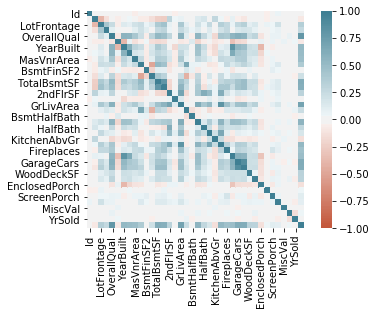

In [72]:
# Correlation
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.savefig('result/img/heatmap.png', dpi=300, bbox_inches='tight')

In [73]:
sale_price_corr = pd.DataFrame(df.corr())['SalePrice']
sale_price_corr.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

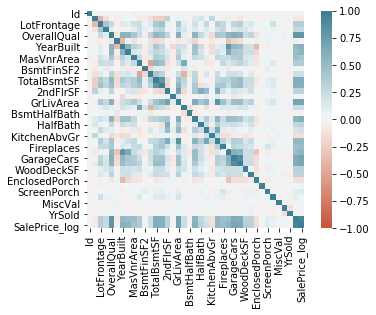

In [74]:
# Getting Log of the Sales Price
sale_price_log_df = df
sale_price_log_df['SalePrice_log'] = np.log(df['SalePrice'])
sale_price_log_df = sale_price_log_df.drop(['SalePrice'],axis=1)
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.savefig('result/img/log_heatmap.png', dpi=300, bbox_inches='tight')

In [75]:
# Logging Sales
log_sale_price_corr = pd.DataFrame(sale_price_log_df.corr())['SalePrice_log']
log_sale_price_corr.sort_values(ascending=False)

SalePrice_log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [76]:
# hexbin plots
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea']
for column in columns:
    plt.hexbin(df['SalePrice'],df[column])
    plt.xlabel('SalePrice')
    plt.ylabel(column)
    plt.savefig('result/img/hexbin-SalePrice-'+column+'.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [77]:
# Creating Boxplots
columns = ['MSSubClass','MSZoning','MasVnrType']
for column in columns:
    df_boxplot = df[['Id','SalePrice',column]]
    pivoted = df_boxplot.pivot_table(index='Id',columns=column,values='SalePrice')
    pivoted.boxplot(grid=False)
    plt.title('SalePrice-'+column)
    plt.ylabel('SalePrice')
    plt.xlabel(column)
    plt.savefig('result/img/Boxplot-SalePrice-'+column+'.png')
    plt.clf()



C:\Users\Reza\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Reza\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Reza\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences 

<Figure size 432x288 with 0 Axes>

## PHASE 1
Dropping NAs

In [78]:
print('The Shape of the original df is:')
print(df.shape)
print('The shape of the df after removing NA rows is:')
df.dropna().shape

The Shape of the original df is:
(1460, 82)
The shape of the df after removing NA rows is:


(0, 82)

So removing all NAs is not logical to do first we must handle 
The columns that have too many missing values.

In [79]:
high_null_cols = 'Alley،PoolQC،Fence،MiscFeature'
high_null_cols = list(high_null_cols.split('،'))
for col in high_null_cols:
    df = df.drop(col,axis=1)
print("Shape of df after removing high null percent cols:")
df.shape

Shape of df after removing high null percent cols:


(1460, 78)

In [80]:
#Dropping FireplaceQu Columns
df = df.drop('FireplaceQu',axis=1)
print('NA columns so far:')
df.isna().any()

NA columns so far:


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
SalePrice_log    False
Length: 77, dtype: bool

In [81]:
for col in df.columns[df.isna().any()].tolist():
    print(col+"-----"+str(df[col].dtype))
print('Total Number of NA columns:')
print(len(df.columns[df.isna().any()].tolist()))

LotFrontage-----float64
MasVnrType-----object
MasVnrArea-----float64
BsmtQual-----object
BsmtCond-----object
BsmtExposure-----object
BsmtFinType1-----object
BsmtFinType2-----object
Electrical-----object
GarageType-----object
GarageYrBlt-----float64
GarageFinish-----object
GarageQual-----object
GarageCond-----object
Total Number of NA columns:
14


In [82]:
#
df = df.interpolate()


Remaining Columns are of object type
Let's count the percent of NA <br>
After that we will replace them by their respective mode

In [83]:
for column in df.columns[df.isna().any()].tolist():
    print(column+'-------'+str(100*(df[column].isnull().sum())/df.shape[0]))

MasVnrType-------0.547945205479452
BsmtQual-------2.5342465753424657
BsmtCond-------2.5342465753424657
BsmtExposure-------2.6027397260273974
BsmtFinType1-------2.5342465753424657
BsmtFinType2-------2.6027397260273974
Electrical-------0.0684931506849315
GarageType-------5.5479452054794525
GarageFinish-------5.5479452054794525
GarageQual-------5.5479452054794525
GarageCond-------5.5479452054794525


In [84]:
for column in df.columns[df.isna().any()].tolist():
    df[column].fillna(df[column].mode()[0],inplace=True)

In [85]:
print('The Total NA Values is:')
print(df.isnull().sum().sum())


The Total NA Values is:
0


In [86]:
df = df.drop('SalePrice_log',axis=1)
df.to_csv('preprocessed.csv')

Now we encode our categorical variables according to their type (nominal,ordianl) <br>
Then we normalize our data. <br>
# NOTE: 
If you want to go on with Dropping Na methods load the dropped-na-df

In [87]:
# df = pd.read_csv('dropped-na-df.csv')
df = pd.read_csv('preprocessed.csv')
df= df.iloc[:,1:]
df = df.drop(['GarageQual','Condition2','Id'],axis=1)

In [88]:
# printing unique values
object_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        object_columns.append(column)
        print("------- "+column+" -------")
        for i in df[column].unique():
            print(i,end=" ")
        print()
        

------- MSZoning -------
RL RM C (all) FV RH 
------- Street -------
Pave Grvl 
------- LotShape -------
Reg IR1 IR2 IR3 
------- LandContour -------
Lvl Bnk Low HLS 
------- Utilities -------
AllPub NoSeWa 
------- LotConfig -------
Inside FR2 Corner CulDSac FR3 
------- LandSlope -------
Gtl Mod Sev 
------- Neighborhood -------
CollgCr Veenker Crawfor NoRidge Mitchel Somerst NWAmes OldTown BrkSide Sawyer NridgHt NAmes SawyerW IDOTRR MeadowV Edwards Timber Gilbert StoneBr ClearCr NPkVill Blmngtn BrDale SWISU Blueste 
------- Condition1 -------
Norm Feedr PosN Artery RRAe RRNn RRAn PosA RRNe 
------- BldgType -------
1Fam 2fmCon Duplex TwnhsE Twnhs 
------- HouseStyle -------
2Story 1Story 1.5Fin 1.5Unf SFoyer SLvl 2.5Unf 2.5Fin 
------- RoofStyle -------
Gable Hip Gambrel Mansard Flat Shed 
------- RoofMatl -------
CompShg WdShngl Metal WdShake Membran Tar&Grv Roll ClyTile 
------- Exterior1st -------
VinylSd MetalSd Wd Sdng HdBoard BrkFace WdShing CemntBd Plywood AsbShng Stucco BrkC

Encoding

In [89]:
one_hot_columns = ['MSZoning','SaleCondition','SaleType','GarageType','Functional','Electrical','Heating','Foundation','MasVnrType','Exterior2nd','RoofMatl','RoofStyle','HouseStyle','BldgType','Condition1','Neighborhood','LotConfig','Exterior1st']
df['PavedDrive'] = df['PavedDrive'].map({
    'N':0,
    'P':1,
    'Y':2
})
try:
    df['GarageCond'] = df['GarageCond'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
try:
    df['GarageFinish'] = df['GarageFinish'].map({
        'NA':0,
        'Unf':1,
        'RFn':2,
        'Fin':3
    })
except:
    pass
df['KitchenQual'] = df['KitchenQual'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['CentralAir'] = df['CentralAir'].map({
    'N':0,
    'Y':1
})
df['HeatingQC'] = df['HeatingQC'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
try:
    df['BsmtFinType1'] = df['BsmtFinType1'].map({
        'NA':0,
        'Unf':1,
        'LwQ':2,
        'Rec':3,
        'BLQ':4,
        'ALQ':5,
        'GLQ':6
    })
except:
    pass
try:
    df['BsmtFinType2'] = df['BsmtFinType2'].map({
        'NA':0,
        'Unf':1,
        'LwQ':2,
        'Rec':3,
        'BLQ':4,
        'ALQ':5,
        'GLQ':6
    })
except:
    pass
try:
    df['BsmtExposure'] = df['BsmtExposure'].map({
        'NA':0,
        'No':1,
        'Mn':2,
        'Av':3,
        'Gd':4
    })
except:
    pass
try:
    df['BsmtCond'] = df['BsmtCond'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
try:
    df['BsmtQual'] = df['BsmtQual'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
df['ExterCond'] = df['ExterCond'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['ExterQual'] = df['ExterQual'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['LandSlope'] = df['LandSlope'].map({
    'Gtl':0,
    'Mod':1,
    'Sev':2
})
df['Utilities'] = df['Utilities'].map({
    'ELO':0,
    'NoSeWa':1,
    'NoSewr':2,
    'AllPub':3
})
df['LandContour'] = df['LandContour'].map({
    'Low':0,
    'HLS':1,
    'Bnk':2,
    'Lvl':3
})
df['LotShape'] = df['LotShape'].map({
    'IR3':0,
    'IR2':1,
    'IR1':2,
    'Reg':3
})
df['Street'] = df['Street'].map({
    'NA':0,
    'Pave':1,
    'Grvl':2
})

In [90]:
df = pd.get_dummies(df,columns=one_hot_columns)

In [91]:
df.to_csv('Encoded.csv')

Normalizing Data

In [92]:
normalizer = MinMaxScaler()
x = df.values
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [2]:
df.to_csv('normalized.csv')

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv('normalized.csv')
df = df.iloc[:,1:]
df

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.150685,0.033420,0.0,1.000000,1.0,1.0,0.0,0.666667,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.0,1.000000,1.0,1.0,0.0,0.555556,0.875,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.0,0.666667,1.0,1.0,0.0,0.666667,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.0,0.666667,1.0,1.0,0.0,0.666667,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.215753,0.060576,0.0,0.666667,1.0,1.0,0.0,0.777778,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.0,1.000000,1.0,1.0,0.0,0.555556,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,0.000000,0.219178,0.055505,0.0,1.000000,1.0,1.0,0.0,0.555556,0.625,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.294118,0.154110,0.036187,0.0,1.000000,1.0,1.0,0.0,0.666667,1.000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.000000,0.160959,0.039342,0.0,1.000000,1.0,1.0,0.0,0.444444,0.625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_columns = list(df.columns)
train_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family'

Train, Test dividing

In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

K-Neighbors Regressor 

In [10]:
def denormalize(x):
    org_values = []
    df = pd.read_csv('preprocessed.csv')
    df= df.iloc[:,1:]
    SalePrice = df['SalePrice'].values
    for val in x:
        org_values.append(val*(max(SalePrice)-min(SalePrice))+min(SalePrice))
    return org_values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_neigh = [i for i in range(1,30)]
RMSE = []
MAE = []
R2 = []
y_test = denormalize(y_test)
for i in range(1,30):
    KNReg = KNeighborsRegressor(n_neighbors=i)
    KNReg.fit(X_train,y_train)
    y_pred = KNReg.predict(X_test)
    y_pred = denormalize(y_pred)
    RMSE.append(mean_squared_error(y_test,y_pred,squared=False))
    MAE.append(mean_absolute_error(y_test,y_pred))
    R2.append(KNReg.score(X_train,y_train))
print('DONE')

DONE


In [97]:
figure = plt.figure()
plt.title('RMSE vs neighbors')
plt.plot(n_neigh,RMSE)
plt.xlabel('neighbors')
plt.ylabel('RMSE')
plt.savefig('result/img/KNN-RMSE.png')
plt.clf()
plt.title('MAE vs neighbors')
plt.plot(n_neigh,MAE)
plt.xlabel('neighbors')
plt.ylabel('MAE')
plt.savefig('result/img/KNN-MAE.png')
plt.clf()
plt.title('R2 vs neighbors')
plt.plot(n_neigh,R2)
plt.xlabel('neighbors')
plt.ylabel('R2')
plt.savefig('result/img/KNN-R2.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [98]:
print('min value of RMSE is:')
print(min(RMSE))
print('n_neighbors for min RMSE:')
print(n_neigh[RMSE.index(min(RMSE))])
print('min value of MAE is:')
print(min(MAE))
print('n_neighbors for min MAE:')
print(n_neigh[MAE.index(min(MAE))])
print('R2 for best neighbors')
print(R2[n_neigh[MAE.index(min(MAE))]-1])

min value of RMSE is:
44853.18553390963
n_neighbors for min RMSE:
6
min value of MAE is:
26486.20395738204
n_neighbors for min MAE:
6
R2 for best neighbors
0.7644420420604517


next is linear regression

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = denormalize(y_test)
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)
y_pred = LinReg.predict(X_test)
y_pred = denormalize(y_pred)
print('RMSE:')
print(mean_squared_error(y_test,y_pred,squared=False))
print('MAE:')
print(mean_absolute_error(y_test,y_pred))
print('R2:')
print(LinReg.score(X_train,y_train))

RMSE:
325013960314077.3
MAE:
21566483113721.215
R2:
0.9069361076874223


Next is decision tree regressor


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
max_depth = [i for i in range(1,100)]
RMSE = []
MAE = []
R2 = []
y_test = denormalize(y_test)
for i in max_depth:
    TreeReg = DecisionTreeRegressor(max_depth=i)
    TreeReg.fit(X_train,y_train)
    y_pred = TreeReg.predict(X_test)
    y_pred = denormalize(y_pred)
    RMSE.append(mean_squared_error(y_test,y_pred,squared=False))
    MAE.append(mean_absolute_error(y_test,y_pred))
    R2.append(TreeReg.score(X_train,y_train))
print('DONE')

DONE


In [101]:
figure = plt.figure()
plt.title('RMSE vs depth')
plt.plot(max_depth,RMSE)
plt.xlabel('depth')
plt.ylabel('RMSE')
plt.savefig('result/img/DT-RMSE.png')
plt.clf()
plt.title('MAE vs depth')
plt.plot(max_depth,MAE)
plt.xlabel('depth')
plt.ylabel('MAE')
plt.savefig('result/img/DT-MAE.png')
plt.clf()
plt.title('R2 vs neighbors')
plt.plot(max_depth,R2)
plt.xlabel('depth')
plt.ylabel('R2')
plt.savefig('result/img/DT-R2.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [102]:
print('min value of RMSE is:')
print(min(RMSE))
print('max_depth for min RMSE:')
print(max_depth[RMSE.index(min(RMSE))])
print('min value of MAE is:')
print(min(MAE))
print('max_depth for min MAE:')
print(max_depth[MAE.index(min(MAE))])
print('R2 for best max_depth')
print(R2[max_depth[MAE.index(min(MAE))]-1])


min value of RMSE is:
38343.560865836596
max_depth for min RMSE:
6
min value of MAE is:
25669.992389649928
max_depth for min MAE:
44
R2 for best max_depth
0.9999998288932614


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = denormalize(y_test)
RFReg = RandomForestRegressor()
RFReg.fit(X_train,y_train)
y_pred = RFReg.predict(X_test)
y_pred = denormalize(y_pred)
print(mean_squared_error(y_test,y_pred,squared=False))
print(mean_absolute_error(y_test,y_pred))
print(RFReg.score(X_train,y_train))
print('DONE')

27222.14855770983
16965.35875051477
0.9781350940869339
DONE


In [106]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [110]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [115]:
def evaluate(model, y_test):
    predictions = model.predict(y_test)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mae = mean_absolute_error(y_test,y_pred)
    return rmse,mae

In [111]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

## RandomSearchCV Best Params

{'n_estimators': 400, <br>
 'min_samples_split': 2, <br>
 'min_samples_leaf': 1,<br>
 'max_features': 'sqrt',<br>
 'max_depth': None,<br>
 'bootstrap': False}

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = denormalize(y_test)
RFReg = RandomForestRegressor(n_estimators=400,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features= 'sqrt',
    max_depth=None,
    bootstrap=False)
RFReg.fit(X_train,y_train)
y_pred = RFReg.predict(X_test)
y_pred = denormalize(y_pred)
print('RMSE:')
print(mean_squared_error(y_test,y_pred,squared=False))
print('MAE:')
print(mean_absolute_error(y_test,y_pred))
print('R2:')
print(RFReg.score(X_train,y_train))

RMSE:
27275.59828124693
MAE:
16140.284921993914
R2:
0.9999999971101894


In [46]:
joblib.dump(RFReg,'RF.sav')

['RF.sav']

In [127]:
# Create the parameter grid based on the results of random search 
param_grid = {
 'n_estimators': [400,600,1000],
 'min_samples_split': [2,3,4,5],
 'min_samples_leaf': [1,2,3],
 'max_features': ['sqrt'],
 'max_depth': [None,5,10,50,100],
 'bootstrap': [False]}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [129]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

## Best Params for Grid Search

{'bootstrap': False, <br>
 'max_depth': None,<br>
 'max_features': 'sqrt',<br>
 'min_samples_leaf': 1,<br>
 'min_samples_split': 2,<br>
 'n_estimators': 400}

Fitting Voting Regression


In [43]:
linearRegression = LinearRegression()
KNN = KNeighborsRegressor(n_neighbors=6)
DT = DecisionTreeRegressor(max_depth=6)
RF = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features= 'sqrt', max_depth=None, bootstrap=False)
VR = VotingRegressor([('dt',DT),('knn',KNN)])
VR

VotingRegressor(estimators=[('dts',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse', max_depth=6,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best')),
                            ('knn',
                             KNeighborsRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = denormalize(y_test)
VR.fit(X_train,y_train)
y_pred = VR.predict(X_test)
y_pred = denormalize(y_pred)
print(mean_squared_error(y_test,y_pred,squared=False))
print(mean_absolute_error(y_test,y_pred))
print(VR.score(X_train,y_train))
print('DONE')

33889.5237324343
19229.392040525116
0.9411104619750574
DONE


Kaggle
First Handling The test dataset

In [4]:
df = pd.read_csv('data/test.csv')
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','GarageQual','Condition2'],axis=1)
for column in df.columns[df.isna().any()].tolist():
    df[column].fillna(df[column].mode()[0],inplace=True)
df = df.interpolate()
one_hot_columns = ['MSZoning','SaleCondition','SaleType','GarageType','Functional','Electrical','Heating','Foundation','MasVnrType','Exterior2nd','RoofMatl','RoofStyle','HouseStyle','BldgType','Condition1','Neighborhood','LotConfig','Exterior1st']
df['PavedDrive'] = df['PavedDrive'].map({
    'N':0,
    'P':1,
    'Y':2
})
try:
    df['GarageCond'] = df['GarageCond'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
try:
    df['GarageFinish'] = df['GarageFinish'].map({
        'NA':0,
        'Unf':1,
        'RFn':2,
        'Fin':3
    })
except:
    pass
df['KitchenQual'] = df['KitchenQual'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['CentralAir'] = df['CentralAir'].map({
    'N':0,
    'Y':1
})
df['HeatingQC'] = df['HeatingQC'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
try:
    df['BsmtFinType1'] = df['BsmtFinType1'].map({
        'NA':0,
        'Unf':1,
        'LwQ':2,
        'Rec':3,
        'BLQ':4,
        'ALQ':5,
        'GLQ':6
    })
except:
    pass
try:
    df['BsmtFinType2'] = df['BsmtFinType2'].map({
        'NA':0,
        'Unf':1,
        'LwQ':2,
        'Rec':3,
        'BLQ':4,
        'ALQ':5,
        'GLQ':6
    })
except:
    pass
try:
    df['BsmtExposure'] = df['BsmtExposure'].map({
        'NA':0,
        'No':1,
        'Mn':2,
        'Av':3,
        'Gd':4
    })
except:
    pass
try:
    df['BsmtCond'] = df['BsmtCond'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
try:
    df['BsmtQual'] = df['BsmtQual'].map({
        'NA':0,
        'Po':1,
        'Fa':2,
        'TA':3,
        'Gd':4,
        'Ex':5
    })
except:
    pass
df['ExterCond'] = df['ExterCond'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['ExterQual'] = df['ExterQual'].map({
    'Po':0,
    'Fa':1,
    'TA':2,
    'Gd':3,
    'Ex':4
})
df['LandSlope'] = df['LandSlope'].map({
    'Gtl':0,
    'Mod':1,
    'Sev':2
})
df['Utilities'] = df['Utilities'].map({
    'ELO':0,
    'NoSeWa':1,
    'NoSewr':2,
    'AllPub':3
})
df['LandContour'] = df['LandContour'].map({
    'Low':0,
    'HLS':1,
    'Bnk':2,
    'Lvl':3
})
df['LotShape'] = df['LotShape'].map({
    'IR3':0,
    'IR2':1,
    'IR1':2,
    'Reg':3
})
df['Street'] = df['Street'].map({
    'NA':0,
    'Pave':1,
    'Grvl':2
})
df = pd.get_dummies(df,columns=one_hot_columns)
normalizer = MinMaxScaler()
id_col = df['Id']
df = df.drop('Id',axis=1)
x = df.values
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)
df

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.000000,0.329609,0.184147,0.0,1.000000,1.000000,0.0,0.0,0.444444,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.335196,0.232124,0.0,0.666667,1.000000,0.0,0.0,0.555556,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.296089,0.224197,0.0,0.666667,1.000000,0.0,0.0,0.444444,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.235294,0.318436,0.154326,0.0,0.666667,1.000000,0.0,0.0,0.555556,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.588235,0.122905,0.064121,0.0,0.666667,0.333333,0.0,0.0,0.777778,0.500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.008453,0.0,1.000000,1.000000,0.0,0.0,0.333333,0.750,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,0.823529,0.000000,0.007691,0.0,1.000000,1.000000,0.0,0.0,0.333333,0.500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.776536,0.336115,0.0,1.000000,1.000000,0.0,0.0,0.444444,0.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,0.382353,0.229050,0.162724,0.0,1.000000,1.000000,0.0,0.0,0.444444,0.500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_columns = list(df.columns)
missing_cols = []
for col in train_columns:
    if col not in test_columns:
        df[col] = 0

df.shape

(1459, 206)

In [6]:
df = df.drop('SalePrice',axis=1)

In [7]:
loaded_model = joblib.load('RF.sav')
print('DONE')

DONE


In [8]:
predicted_ones = loaded_model.predict(df)
print('DONE')

DONE


In [11]:
predicted_ones = denormalize(predicted_ones)
predicted_ones

[134517.52125,
 165267.78625000003,
 189383.96375000002,
 193700.7383333333,
 200857.9291666667,
 185404.72250000006,
 176741.40250000003,
 174373.59125,
 192535.27499999976,
 145340.55,
 220929.2437499998,
 105432.65416666667,
 110906.9291666667,
 154787.50500000006,
 125436.20750000003,
 308164.29250000004,
 248369.57124999998,
 281120.42125000013,
 274657.12375000014,
 345494.08250000025,
 286645.7324999999,
 215410.0724999999,
 186446.39124999996,
 172538.4391666666,
 182789.66125000006,
 204799.3237499999,
 286268.2475000001,
 243169.91000000006,
 195451.82250000007,
 242674.9749999999,
 196150.71124999996,
 116765.7725,
 185683.44499999992,
 268861.91250000003,
 283899.29,
 236597.20874999993,
 185779.14874999993,
 164554.19249999995,
 161378.62874999992,
 160443.28625,
 172091.15249999997,
 161542.4949999999,
 282581.63249999995,
 228095.65999999986,
 227730.54000000012,
 194343.41375000007,
 237774.60750000016,
 199820.4266666668,
 168344.68125000008,
 162759.8600000001,
 16991

In [27]:
kaggle_result = pd.DataFrame(index=[i for i in range(1461)],columns=['Id','SalePrice'])
kaggle_result['Id'] = id_col
kaggle_result['SalePrice'] = predicted_ones
kaggle_result

ValueError: Length of values does not match length of index

In [15]:
import csv
with open('kaggle-results.csv','w',newline='') as file:
    writer = csv.writer(file,delimiter=',')
    for i,j in zip(id_col,predicted_ones):
        writer.writerow((i,j))

In [34]:
1+1


2